In [1]:
import math
import pandas
import seaborn
import numpy as np
import matplotlib.pyplot as plt

pandas.options.display.max_columns = None
pandas.options.display.max_rows = None
pandas.options.display.max_colwidth = None
seaborn.set(rc={"figure.figsize":(7,7)})

drop = ["StartDate", "EndDate", "Status", "IPAddress", "Progress", "Duration (in seconds)", "RecordedDate", "ResponseId", "RecipientLastName", "RecipientFirstName", "RecipientEmail", "ExternalReference", "LocationLatitude", "LocationLongitude", "DistributionChannel", "Finished", "UserLanguage"]

laney1 = pandas.read_csv("../spring/csv/laney_build_june.csv").drop(columns=drop) # removing unneeded columns listed above
questions1 = laney1.loc[0, :].values.flatten().tolist()
laney1 = laney1.drop(0) # removing unneeded first row of questions
laney1 = laney1.drop(1) # removing unneeded second row of import IDs

laney2 = pandas.read_csv("../fall/csv/laney_dec.csv").drop(columns=drop) # removing unneeded columns listed above
questions2 = laney2.loc[0, :].values.flatten().tolist()
laney2 = laney2.drop(0) # removing unneeded first row of questions
laney2 = laney2.drop(1) # removing unneeded second row of import IDs

columns = list(set(list(laney1.columns)) & set(list(laney2.columns)))
columns.sort()

laney = pandas.concat([laney1[columns], laney2[columns]], axis=0, ignore_index=True)

def get_response(df, col):
    
    if "Programming" in col and "." in col:
        
        results = {
            "valid": 0,
            "never": 0,
            "rarely": 0,
            "sometimes": 0,
            "very often": 0,
            "always": 0
        }
        
        data = dict(df[col].str.lower().value_counts())

        for key in data:

            if key in results:
                results[key] += data[key] 

        results["valid"] += sum(data.values())
        data = results

        return data
        
    else:
    
        results = {
            "valid": 0,
            "strongly disagree": 0,
            "somewhat disagree": 0,
            "unsure or undecided": 0,
            "somewhat agree": 0,
            "strongly agree": 0,
        }

        data = dict(df[col].str.lower().value_counts())

        for key in data:

            if key in results:
                results[key] += data[key] 

        results["valid"] += sum(data.values())
        data = results

        return data

def multi_response(df, columns):
    
    results = {}
    
    for col in columns:
        
        results[col] = get_response(df, col)
                                
    return results

def total_multi(obj):
    
    results = {
        "valid": 0,
        "pos": 0,
        "pos_with_n": 0
    }
    
    for key in obj:

        results["valid"] += obj[key]["valid"]

        if "unsure or undecided" in obj[key]:

            results["pos"] += obj[key]["strongly agree"] + obj[key]["somewhat agree"]
            results["pos_with_n"] += obj[key]["unsure or undecided"]

        if "rarely" in obj[key]:

            results["pos"] += obj[key]["sometimes"] + obj[key]["very often"] + obj[key]["always"]

        if "not confident at all" in obj[key]:

            results["pos"] += obj[key]["slightly confident"] + obj[key]["fairly confident"] + obj[key]["very confident"]

    results["pos_with_n"] += results["pos"]

    return results

<hr style="border:2px solid black">

<b>First we will be examining all the learners responses to get a sense of our program's overall impact in various areas.</b> Learners responded to questions which assessed their technical skills, based on their ability to communicate about technology and perform general programming task. Our questions then assessed their values towards using tech for good, their sense of community within the program, and knowledge gained about career opportunities in tech. Finally, we inquire about their intersectional tech identity, how much they feel like they belong in tech and can be successful in the field.

<b>It is important to note that the number of survey responses differs from the number of verified program graduates. Among those responses, not every survey participant answered every question.</b>

In this evaluation, <b>"positive responses"</b> is referring to the response choices of <b>"Sometimes", "Very often", "Always", "Somewhat agree",</b> and <b>"Strongly agree".</b>

In [2]:
# combine Communication, Programming & Python

data = multi_response(laney, ["QID1_1", "QID1_2", "Programming Skills_1", "Programming Skills_2", "Programming Skills_3", "Programming Skills_1.1", "Programming Skills_2.1"])

laney_totals = total_multi(data)

data, laney_totals

({'QID1_1': {'valid': 25,
   'strongly disagree': 0,
   'somewhat disagree': 0,
   'unsure or undecided': 2,
   'somewhat agree': 9,
   'strongly agree': 14},
  'QID1_2': {'valid': 25,
   'strongly disagree': 0,
   'somewhat disagree': 1,
   'unsure or undecided': 4,
   'somewhat agree': 6,
   'strongly agree': 14},
  'Programming Skills_1': {'valid': 25,
   'strongly disagree': 0,
   'somewhat disagree': 0,
   'unsure or undecided': 5,
   'somewhat agree': 10,
   'strongly agree': 10},
  'Programming Skills_2': {'valid': 25,
   'strongly disagree': 0,
   'somewhat disagree': 1,
   'unsure or undecided': 2,
   'somewhat agree': 6,
   'strongly agree': 16},
  'Programming Skills_3': {'valid': 25,
   'strongly disagree': 0,
   'somewhat disagree': 1,
   'unsure or undecided': 4,
   'somewhat agree': 11,
   'strongly agree': 9},
  'Programming Skills_1.1': {'valid': 25,
   'never': 2,
   'rarely': 1,
   'sometimes': 6,
   'very often': 10,
   'always': 6},
  'Programming Skills_2.1': {'va

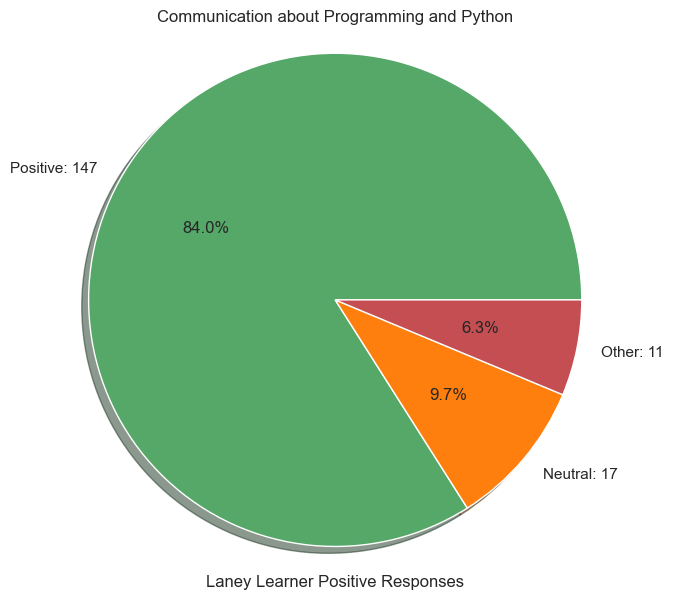

In [3]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = ['Positive: {}'.format(laney_totals["pos"]), 'Neutral: {}'.format(laney_totals["pos_with_n"] - laney_totals["pos"]), 'Other: {}'.format(laney_totals["valid"] - laney_totals["pos_with_n"])]

# creating percantages from data for visuals
per = (laney_totals["pos"] / laney_totals["valid"]) * 100
per2 = ((laney_totals["pos_with_n"] - laney_totals["pos"]) / laney_totals["valid"]) * 100
per3 = ((laney_totals["valid"] - laney_totals["pos_with_n"]) / laney_totals["valid"]) * 100

size_of_groups = [per, per2, per3]

fig1, ax1 = plt.subplots()
ax1.pie(size_of_groups, colors=["g", "tab:orange", "r"], labels=labels, autopct='%1.1f%%',
        shadow=True)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.xlabel("Laney Learner Positive Responses")
plt.title("Communication about Programming and Python")
# plt.savefig('images/laney_comm_about_tech_pie.png')
plt.show()

<b>There was a total of 175 responses given from Laney learners for Communication about Technology. Of those responses, 164 (93.7%) were positive including neutral responses. 147 (84%) were positive not including neutral responses.</b>

In [4]:
# combine, HtH values, Social justice and community, HtH community & belongingness, Goals, Career

data = multi_response(laney, ["SJ & Community_1", "Community_1", "Community_2", "Community_3", "Community_4", "Goals_1", "Career Opportunities_1", "Career Opportunities_2"])

laney_totals = total_multi(data)

data, laney_totals

({'SJ & Community_1': {'valid': 21,
   'strongly disagree': 0,
   'somewhat disagree': 0,
   'unsure or undecided': 0,
   'somewhat agree': 5,
   'strongly agree': 16},
  'Community_1': {'valid': 21,
   'strongly disagree': 0,
   'somewhat disagree': 0,
   'unsure or undecided': 1,
   'somewhat agree': 10,
   'strongly agree': 10},
  'Community_2': {'valid': 21,
   'strongly disagree': 0,
   'somewhat disagree': 0,
   'unsure or undecided': 1,
   'somewhat agree': 4,
   'strongly agree': 16},
  'Community_3': {'valid': 21,
   'strongly disagree': 0,
   'somewhat disagree': 1,
   'unsure or undecided': 1,
   'somewhat agree': 5,
   'strongly agree': 14},
  'Community_4': {'valid': 21,
   'strongly disagree': 2,
   'somewhat disagree': 2,
   'unsure or undecided': 3,
   'somewhat agree': 4,
   'strongly agree': 10},
  'Goals_1': {'valid': 21,
   'strongly disagree': 1,
   'somewhat disagree': 1,
   'unsure or undecided': 0,
   'somewhat agree': 8,
   'strongly agree': 11},
  'Career Oppo

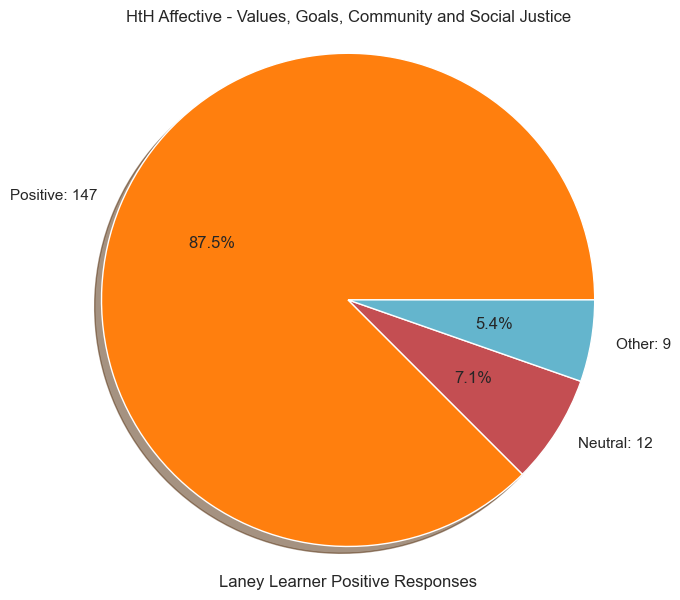

In [5]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = ['Positive: {}'.format(laney_totals["pos"]), 'Neutral: {}'.format(laney_totals["pos_with_n"] - laney_totals["pos"]), 'Other: {}'.format(laney_totals["valid"] - laney_totals["pos_with_n"])]

# creating percantages from data for visuals
per = (laney_totals["pos"] / laney_totals["valid"]) * 100
per2 = ((laney_totals["pos_with_n"] - laney_totals["pos"]) / laney_totals["valid"]) * 100
per3 = ((laney_totals["valid"] - laney_totals["pos_with_n"]) / laney_totals["valid"]) * 100

size_of_groups = [per, per2, per3]

fig1, ax1 = plt.subplots()
ax1.pie(size_of_groups, colors=["tab:orange", "r", "c"], labels=labels, autopct='%1.1f%%',
        shadow=True)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.xlabel("Laney Learner Positive Responses")
plt.title("HtH Affective - Values, Goals, Community and Social Justice")
# plt.savefig('images/laney_affective_pie.png')
plt.show()

<b>There was a total of 168 responses given from Laney learners for the HtH Affective section. Of those responses, 159 (94.6%) were positive including neutral responses. 147 (87.5%) were positive not including neutral responses.</b>

In [6]:
# intersectional tech identity

data = multi_response(laney, ["Gee_1", "Gee_2", "Gee_3", "McAlpine_1", "McAlpine_2", "McAlpine_3", "McAlpine_4", "McAlpine_5"])

laney_totals = total_multi(data)

data, laney_totals

({'Gee_1': {'valid': 21,
   'strongly disagree': 0,
   'somewhat disagree': 0,
   'unsure or undecided': 2,
   'somewhat agree': 4,
   'strongly agree': 15},
  'Gee_2': {'valid': 21,
   'strongly disagree': 0,
   'somewhat disagree': 0,
   'unsure or undecided': 1,
   'somewhat agree': 4,
   'strongly agree': 16},
  'Gee_3': {'valid': 21,
   'strongly disagree': 0,
   'somewhat disagree': 0,
   'unsure or undecided': 3,
   'somewhat agree': 6,
   'strongly agree': 12},
  'McAlpine_1': {'valid': 21,
   'strongly disagree': 0,
   'somewhat disagree': 0,
   'unsure or undecided': 2,
   'somewhat agree': 6,
   'strongly agree': 13},
  'McAlpine_2': {'valid': 21,
   'strongly disagree': 0,
   'somewhat disagree': 1,
   'unsure or undecided': 3,
   'somewhat agree': 5,
   'strongly agree': 12},
  'McAlpine_3': {'valid': 21,
   'strongly disagree': 0,
   'somewhat disagree': 0,
   'unsure or undecided': 1,
   'somewhat agree': 7,
   'strongly agree': 13},
  'McAlpine_4': {'valid': 21,
   'str

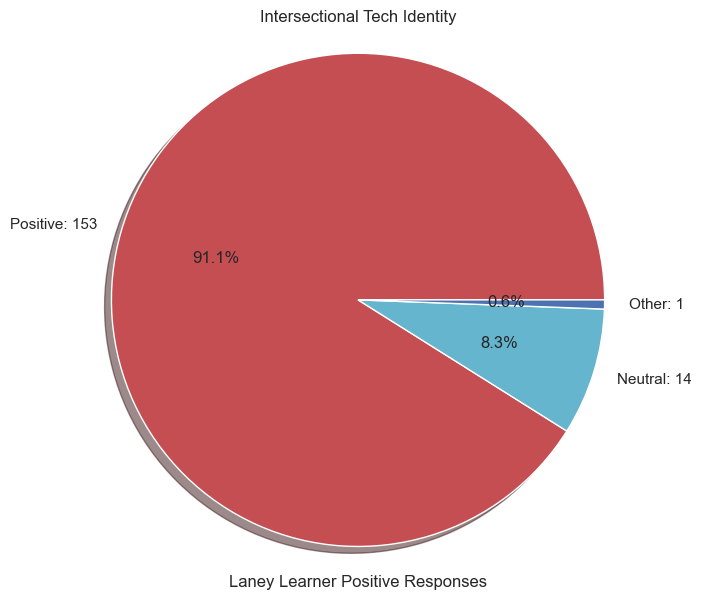

In [7]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = ['Positive: {}'.format(laney_totals["pos"]), 'Neutral: {}'.format(laney_totals["pos_with_n"] - laney_totals["pos"]), 'Other: {}'.format(laney_totals["valid"] - laney_totals["pos_with_n"])]

# creating percantages from data for visuals
per = (laney_totals["pos"] / laney_totals["valid"]) * 100
per2 = ((laney_totals["pos_with_n"] - laney_totals["pos"]) / laney_totals["valid"]) * 100
per3 = ((laney_totals["valid"] - laney_totals["pos_with_n"]) / laney_totals["valid"]) * 100

size_of_groups = [per, per2, per3]

fig1, ax1 = plt.subplots()
ax1.pie(size_of_groups, colors=["r", "c", "b"], labels=labels, autopct='%1.1f%%',
        shadow=True)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.xlabel("Laney Learner Positive Responses")
plt.title("Intersectional Tech Identity")
# plt.savefig('images/laney_identity_pie.png')
plt.show()

<b>There was a total of 168 responses given from Laney learners for Intersectional Tech Identity. Of those responses, 167 (99.4%) were positive including neutral responses. 153 (91.1%) were positive not including neutral responses.</b>

<hr style="border:2px solid black">
    
<b>Next we will be examining the learners responses to our inquiries about their ability to communicate about technology.</b> These questions are marked as the <b>QID1_1</b> and the <b>QID1_2</b> columns within the dataframe. Learners had five choices to choose from as their response to these questions: <b>Strongly Disagree, Somewhat Disagree, Somewhat Disagree, Strongly Agree</b>, and <b>Unsure or Undecided.</b>

In [8]:
data = multi_response(laney, ["QID1_1", "QID1_2"])

laney_totals = total_multi(data)

data, laney_totals

({'QID1_1': {'valid': 25,
   'strongly disagree': 0,
   'somewhat disagree': 0,
   'unsure or undecided': 2,
   'somewhat agree': 9,
   'strongly agree': 14},
  'QID1_2': {'valid': 25,
   'strongly disagree': 0,
   'somewhat disagree': 1,
   'unsure or undecided': 4,
   'somewhat agree': 6,
   'strongly agree': 14}},
 {'valid': 50, 'pos': 43, 'pos_with_n': 49})

In [9]:
# create dataframe for data visualization

viz = pandas.DataFrame(
    {
        "I can communicate verbally or in writing to others about technology or programming.": [
            data["QID1_1"]["strongly agree"],
            data["QID1_1"]["somewhat agree"],
            data["QID1_1"]["unsure or undecided"],
            data["QID1_1"]["somewhat disagree"],
            data["QID1_1"]["strongly disagree"],
        ],
        "I can give a short talk to an audience about technology or programming.": [
            data["QID1_2"]["strongly agree"], 
            data["QID1_2"]["somewhat agree"],
            data["QID1_2"]["unsure or undecided"],
            data["QID1_2"]["somewhat disagree"],
            data["QID1_2"]["strongly disagree"],
        ]
    },
    
   index = [
       "Strongly Agree",
       "Somewhat Agree",
       "Unsure or Undecided",
       "Somewhat Disagree",
       "Strongly Disagree"
   ]
)

viz

,I can communicate verbally or in writing to others about technology or programming.,I can give a short talk to an audience about technology or programming.
Strongly Agree,14,14
Somewhat Agree,9,6
Unsure or Undecided,2,4
Somewhat Disagree,0,1
Strongly Disagree,0,0


<AxesSubplot: title={'center': 'Communication about Technology'}>

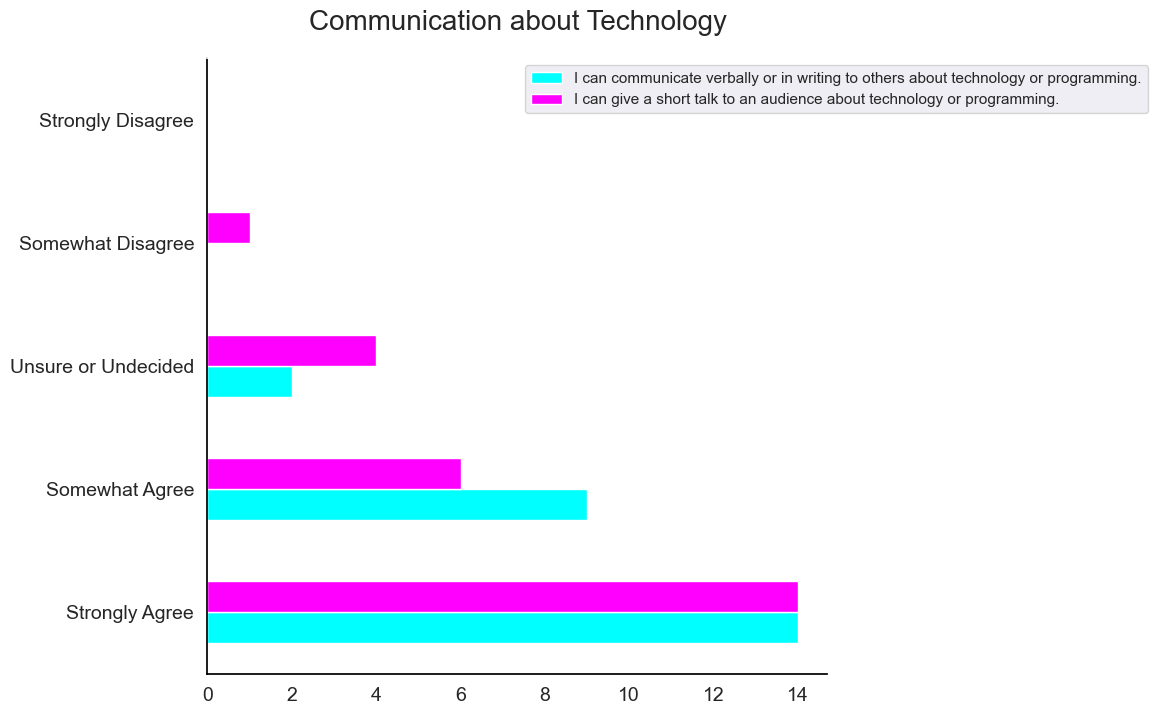

In [10]:
fig = viz.plot(kind='barh', cmap='cool', fontsize=14, figsize=(8,8))

plt.title('Communication about Technology', fontsize=20, pad=20)
fig.legend(bbox_to_anchor=(0.5, 1.0))
fig.set_facecolor('white')
fig.spines["bottom"].set_color('black')
fig.spines["left"].set_color('black')
# plt.savefig('images/laney_comm_just_tech.png', bbox_inches='tight')

fig

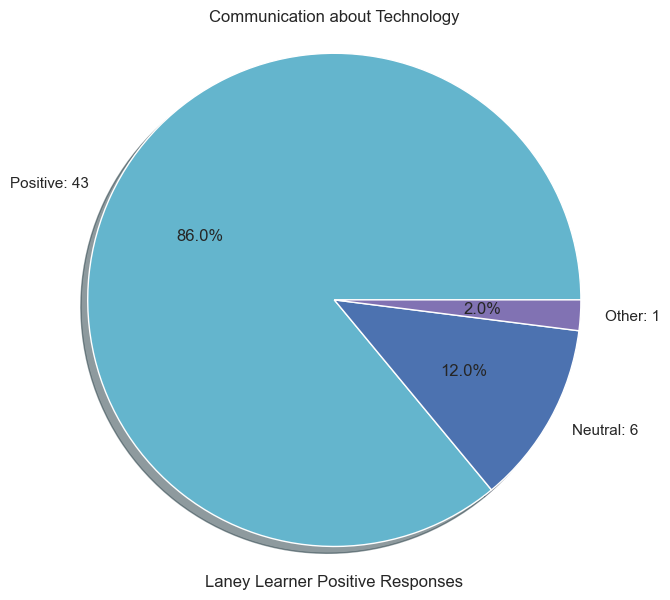

In [11]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = ['Positive: {}'.format(laney_totals["pos"]), 'Neutral: {}'.format(laney_totals["pos_with_n"] - laney_totals["pos"]), 'Other: {}'.format(laney_totals["valid"] - laney_totals["pos_with_n"])]

# creating percantages from data for visuals
per = (laney_totals["pos"] / laney_totals["valid"]) * 100
per2 = ((laney_totals["pos_with_n"] - laney_totals["pos"]) / laney_totals["valid"]) * 100
per3 = ((laney_totals["valid"] - laney_totals["pos_with_n"]) / laney_totals["valid"]) * 100

size_of_groups = [per, per2, per3]

fig1, ax1 = plt.subplots()
ax1.pie(size_of_groups, colors=["c", "b", "m"], labels=labels, autopct='%1.1f%%',
        shadow=True)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.xlabel("Laney Learner Positive Responses")
plt.title("Communication about Technology")
# plt.savefig('images/laney_comm_just_tech_pie.png')
plt.show()

<b> There was a total of 50 responses given for this section of the survey. 49 (98%) were positive including neutral responses. 43 (86%) were positive not including neutral responses.</b>

# I can communicate verbally or in writing to others about technology or programming.

In [12]:
data = get_response(laney, "QID1_1")

data

{'valid': 25,
 'strongly disagree': 0,
 'somewhat disagree': 0,
 'unsure or undecided': 2,
 'somewhat agree': 9,
 'strongly agree': 14}

In [13]:
viz = pandas.DataFrame(
    {
        "Learner Responses": [
            data["strongly agree"],
            data["somewhat agree"],
            data["unsure or undecided"],
            data["somewhat disagree"],
            data["strongly disagree"],
            "TOTAL: {}".format(data["valid"])
        ],
        
        "Percentages": [
            "{}%".format(round((data["strongly agree"] / data["valid"])*100,1)),
            "{}%".format(round((data["somewhat agree"] / data["valid"])*100,1)),
            "{}%".format(round(((data["unsure or undecided"]) / data["valid"])*100,1)),
            "{}%".format(round((data["somewhat disagree"] / data["valid"])*100,1)),
            "{}%".format(round((data["strongly disagree"] / data["valid"])*100,1)),
            "100%"
        ]
    },
    
   index = [
       "Strongly Agree",
       "Somewhat Agree",
       "Unsure or Undecided",
       "Somewhat Disagree",
       "Strongly Disagree",
       ""
   ]
)

viz

,Learner Responses,Percentages
Strongly Agree,14,56.0%
Somewhat Agree,9,36.0%
Unsure or Undecided,2,8.0%
Somewhat Disagree,0,0.0%
Strongly Disagree,0,0.0%
,TOTAL: 25,100%


In [14]:
data = get_response(laney, "QID1_2")

data

{'valid': 25,
 'strongly disagree': 0,
 'somewhat disagree': 1,
 'unsure or undecided': 4,
 'somewhat agree': 6,
 'strongly agree': 14}

In [15]:
viz = pandas.DataFrame(
    {
        "Learner Responses": [
            data["strongly agree"],
            data["somewhat agree"],
            data["unsure or undecided"],
            data["somewhat disagree"],
            data["strongly disagree"],
            "TOTAL: {}".format(data["valid"])
        ],
        
        "Percentages": [
            "{}%".format(round((data["strongly agree"] / data["valid"])*100,1)),
            "{}%".format(round((data["somewhat agree"] / data["valid"])*100,1)),
            "{}%".format(round(((data["unsure or undecided"]) / data["valid"])*100,1)),
            "{}%".format(round((data["somewhat disagree"] / data["valid"])*100,1)),
            "{}%".format(round((data["strongly disagree"] / data["valid"])*100,1)),
            "100%"
        ]
    },
    
   index = [
       "Strongly Agree",
       "Somewhat Agree",
       "Unsure or Undecided",
       "Somewhat Disagree",
       "Strongly Disagree",
       ""
   ]
)

viz

,Learner Responses,Percentages
Strongly Agree,14,56.0%
Somewhat Agree,6,24.0%
Unsure or Undecided,4,16.0%
Somewhat Disagree,1,4.0%
Strongly Disagree,0,0.0%
,TOTAL: 25,100%


<hr style="border:2px solid black">
    
<b>Next we will be examining the learners responses to our inquiries about their general programming and computer science skills.</b> These questions are marked as the <b>Programming Skills_1, Programming Skills_2, Programming Skills_3, Programming Skills_1.1,</b> and the <b>Programming Skills_2.1</b> columns within the dataframe. Learners had five choices to choose from as their response to these questions. For the first three, those choices were <b>Strongly Disagree, Somewhat Disagree, Somewhat Disagree, Strongly Agree</b>, and <b>Unsure or undecided.</b> For the last two, the choices were <b>Never, Rarely, Sometimes, Very often</b>, and <b>Always.</b>

In [16]:
data = multi_response(laney, ["Programming Skills_1", "Programming Skills_2", "Programming Skills_3", "Programming Skills_1.1", "Programming Skills_2.1"])

laney_totals = total_multi(data)

data, laney_totals

({'Programming Skills_1': {'valid': 25,
   'strongly disagree': 0,
   'somewhat disagree': 0,
   'unsure or undecided': 5,
   'somewhat agree': 10,
   'strongly agree': 10},
  'Programming Skills_2': {'valid': 25,
   'strongly disagree': 0,
   'somewhat disagree': 1,
   'unsure or undecided': 2,
   'somewhat agree': 6,
   'strongly agree': 16},
  'Programming Skills_3': {'valid': 25,
   'strongly disagree': 0,
   'somewhat disagree': 1,
   'unsure or undecided': 4,
   'somewhat agree': 11,
   'strongly agree': 9},
  'Programming Skills_1.1': {'valid': 25,
   'never': 2,
   'rarely': 1,
   'sometimes': 6,
   'very often': 10,
   'always': 6},
  'Programming Skills_2.1': {'valid': 25,
   'never': 2,
   'rarely': 3,
   'sometimes': 10,
   'very often': 5,
   'always': 5}},
 {'valid': 125, 'pos': 104, 'pos_with_n': 115})

In [17]:
# create dataframe for data visualization

viz = pandas.DataFrame(
    {
        "I can write code to complete a simple task.": [
            data["Programming Skills_1"]["strongly agree"],
            data["Programming Skills_1"]["somewhat agree"],
            data["Programming Skills_1"]["unsure or undecided"],
            data["Programming Skills_1"]["somewhat disagree"],
            data["Programming Skills_1"]["strongly disagree"],
        ],
        "I increased my programming skills in this program.": [
            data["Programming Skills_2"]["strongly agree"], 
            data["Programming Skills_2"]["somewhat agree"],
            data["Programming Skills_2"]["unsure or undecided"],
            data["Programming Skills_2"]["somewhat disagree"],
            data["Programming Skills_2"]["strongly disagree"],
        ],
        "I could explain or storyboard a software idea that I have.": [
            data["Programming Skills_3"]["strongly agree"], 
            data["Programming Skills_3"]["somewhat agree"],
            data["Programming Skills_3"]["unsure or undecided"],
            data["Programming Skills_3"]["somewhat disagree"],
            data["Programming Skills_3"]["strongly disagree"],
        ]
    },
    
   index = [
       "Strongly Agree",
       "Somewhat Agree",
       "Unsure or Undecided",
       "Somewhat Disagree",
       "Strongly Disagree"
   ]
)

viz

,I can write code to complete a simple task.,I increased my programming skills in this program.,I could explain or storyboard a software idea that I have.
Strongly Agree,10,16,9
Somewhat Agree,10,6,11
Unsure or Undecided,5,2,4
Somewhat Disagree,0,1,1
Strongly Disagree,0,0,0


<AxesSubplot: title={'center': 'General Computer Science Skills (1)'}>

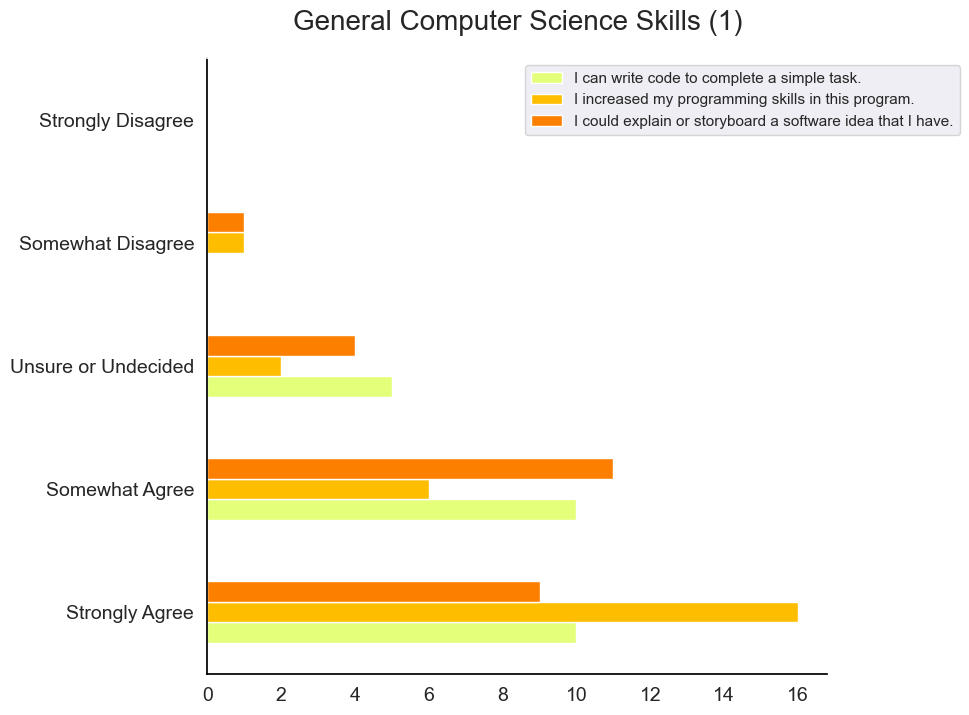

In [18]:
fig = viz.plot(kind='barh', cmap='Wistia', fontsize=14, figsize=(8,8))

plt.title('General Computer Science Skills (1)', fontsize=20, pad=20)
fig.legend(bbox_to_anchor=(0.5, 1.0))
fig.set_facecolor('white')
fig.spines["bottom"].set_color('black')
fig.spines["left"].set_color('black')
# plt.savefig('images/laney_gen_cs1.png', bbox_inches='tight')

fig

In [19]:
# create dataframe for data visualization

viz = pandas.DataFrame(
    {
        "When I have errors in my code, I know of a few things to try or look for.": [
            data["Programming Skills_1.1"]["always"],
            data["Programming Skills_1.1"]["very often"],
            data["Programming Skills_1.1"]["sometimes"],
            data["Programming Skills_1.1"]["rarely"],
            data["Programming Skills_1.1"]["never"],
        ],
        "When I write new code, I leave myself enough comments and notes to know what I did.": [
            data["Programming Skills_2.1"]["always"], 
            data["Programming Skills_2.1"]["very often"],
            data["Programming Skills_2.1"]["sometimes"],
            data["Programming Skills_2.1"]["rarely"],
            data["Programming Skills_2.1"]["never"],
        ]
    },
    
   index = [
       "Always",
       "Very Often",
       "Sometimes",
       "Rarely",
       "Never",
   ]
)

viz

,"When I have errors in my code, I know of a few things to try or look for.","When I write new code, I leave myself enough comments and notes to know what I did."
Always,6,5
Very Often,10,5
Sometimes,6,10
Rarely,1,3
Never,2,2


<AxesSubplot: title={'center': 'General Computer Science Skills (2)'}>

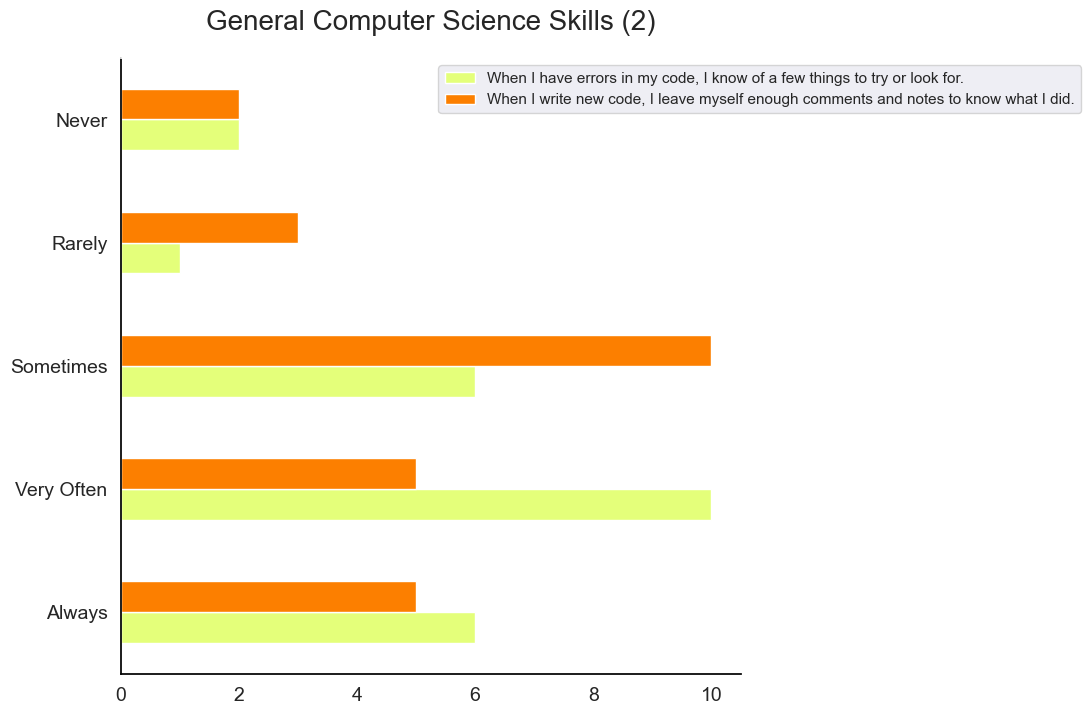

In [20]:
fig = viz.plot(kind='barh', cmap='Wistia', fontsize=14, figsize=(8,8))

plt.title('General Computer Science Skills (2)', fontsize=20, pad=20)
fig.legend(bbox_to_anchor=(0.5, 1.0))
fig.set_facecolor('white')
fig.spines["bottom"].set_color('black')
fig.spines["left"].set_color('black')
# plt.savefig('images/laney_gen_cs2.png', bbox_inches='tight')

fig

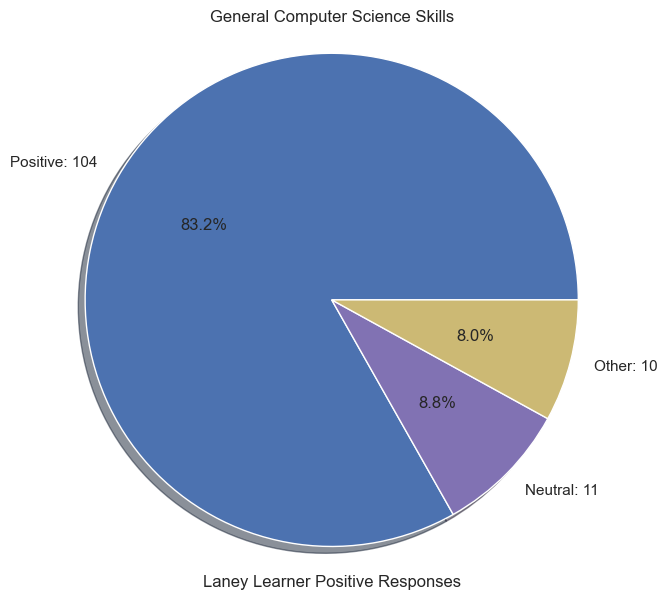

In [21]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = ['Positive: {}'.format(laney_totals["pos"]), 'Neutral: {}'.format(laney_totals["pos_with_n"] - laney_totals["pos"]), 'Other: {}'.format(laney_totals["valid"] - laney_totals["pos_with_n"])]

# creating percantages from data for visuals
per = (laney_totals["pos"] / laney_totals["valid"]) * 100
per2 = ((laney_totals["pos_with_n"] - laney_totals["pos"]) / laney_totals["valid"]) * 100
per3 = ((laney_totals["valid"] - laney_totals["pos_with_n"]) / laney_totals["valid"]) * 100

size_of_groups = [per, per2, per3]

fig1, ax1 = plt.subplots()
ax1.pie(size_of_groups, colors=["b", "m", "y"], labels=labels, autopct='%1.1f%%',
        shadow=True)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.xlabel("Laney Learner Positive Responses")
plt.title("General Computer Science Skills")
# plt.savefig('images/laney_gen_cs_pie.png')
plt.show()

<b> There was a total of 125 responses given for this section of the survey. 115 (92%) were positive including neutral responses. 104 (83.2%) were positive not including neutral responses.</b>

# I can write code to complete a simple task.

In [22]:
data = get_response(laney, "Programming Skills_1")

data

{'valid': 25,
 'strongly disagree': 0,
 'somewhat disagree': 0,
 'unsure or undecided': 5,
 'somewhat agree': 10,
 'strongly agree': 10}

In [23]:
viz = pandas.DataFrame(
    {
        "Learner Responses": [
            data["strongly agree"],
            data["somewhat agree"],
            data["unsure or undecided"],
            data["somewhat disagree"],
            data["strongly disagree"],
            "TOTAL: {}".format(data["valid"])
        ],
        
        "Percentages": [
            "{}%".format(round((data["strongly agree"] / data["valid"])*100,1)),
            "{}%".format(round((data["somewhat agree"] / data["valid"])*100,1)),
            "{}%".format(round(((data["unsure or undecided"]) / data["valid"])*100,1)),
            "{}%".format(round((data["somewhat disagree"] / data["valid"])*100,1)),
            "{}%".format(round((data["strongly disagree"] / data["valid"])*100,1)),
            "100%"
        ]
    },
    
   index = [
       "Strongly Agree",
       "Somewhat Agree",
       "Unsure or Undecided",
       "Somewhat Disagree",
       "Strongly Disagree",
       ""
   ]
)

viz

,Learner Responses,Percentages
Strongly Agree,10,40.0%
Somewhat Agree,10,40.0%
Unsure or Undecided,5,20.0%
Somewhat Disagree,0,0.0%
Strongly Disagree,0,0.0%
,TOTAL: 25,100%


# I increased my programming skills in this program.

In [24]:
data = get_response(laney, "Programming Skills_2")

data

{'valid': 25,
 'strongly disagree': 0,
 'somewhat disagree': 1,
 'unsure or undecided': 2,
 'somewhat agree': 6,
 'strongly agree': 16}

In [25]:
viz = pandas.DataFrame(
    {
        "Learner Responses": [
            data["strongly agree"],
            data["somewhat agree"],
            data["unsure or undecided"],
            data["somewhat disagree"],
            data["strongly disagree"],
            "TOTAL: {}".format(data["valid"])
        ],
        
        "Percentages": [
            "{}%".format(round((data["strongly agree"] / data["valid"])*100,1)),
            "{}%".format(round((data["somewhat agree"] / data["valid"])*100,1)),
            "{}%".format(round(((data["unsure or undecided"]) / data["valid"])*100,1)),
            "{}%".format(round((data["somewhat disagree"] / data["valid"])*100,1)),
            "{}%".format(round((data["strongly disagree"] / data["valid"])*100,1)),
            "100%"
        ]
    },
    
   index = [
       "Strongly Agree",
       "Somewhat Agree",
       "Unsure or Undecided",
       "Somewhat Disagree",
       "Strongly Disagree",
       ""
   ]
)

viz

,Learner Responses,Percentages
Strongly Agree,16,64.0%
Somewhat Agree,6,24.0%
Unsure or Undecided,2,8.0%
Somewhat Disagree,1,4.0%
Strongly Disagree,0,0.0%
,TOTAL: 25,100%


# I could explain or storyboard a software idea that I have.

In [26]:
data = get_response(laney, "Programming Skills_3")

data

{'valid': 25,
 'strongly disagree': 0,
 'somewhat disagree': 1,
 'unsure or undecided': 4,
 'somewhat agree': 11,
 'strongly agree': 9}

In [27]:
viz = pandas.DataFrame(
    {
        "Learner Responses": [
            data["strongly agree"],
            data["somewhat agree"],
            data["unsure or undecided"],
            data["somewhat disagree"],
            data["strongly disagree"],
            "TOTAL: {}".format(data["valid"])
        ],
        
        "Percentages": [
            "{}%".format(round((data["strongly agree"] / data["valid"])*100,1)),
            "{}%".format(round((data["somewhat agree"] / data["valid"])*100,1)),
            "{}%".format(round(((data["unsure or undecided"]) / data["valid"])*100,1)),
            "{}%".format(round((data["somewhat disagree"] / data["valid"])*100,1)),
            "{}%".format(round((data["strongly disagree"] / data["valid"])*100,1)),
            "100%"
        ]
    },
    
   index = [
       "Strongly Agree",
       "Somewhat Agree",
       "Unsure or Undecided",
       "Somewhat Disagree",
       "Strongly Disagree",
       ""
   ]
)

viz

,Learner Responses,Percentages
Strongly Agree,9,36.0%
Somewhat Agree,11,44.0%
Unsure or Undecided,4,16.0%
Somewhat Disagree,1,4.0%
Strongly Disagree,0,0.0%
,TOTAL: 25,100%


# When I have errors in my code, I know of a few things to try or look for.

In [28]:
data = get_response(laney, "Programming Skills_1.1")

data

{'valid': 25,
 'never': 2,
 'rarely': 1,
 'sometimes': 6,
 'very often': 10,
 'always': 6}

In [29]:
viz = pandas.DataFrame(
    {
        "Learner Responses": [
            data["always"],
            data["very often"],
            data["sometimes"],
            data["rarely"],
            data["never"],
            "TOTAL: {}".format(data["valid"])
        ],
        
        "Percentages": [
            "{}%".format(round((data["always"] / data["valid"])*100,1)),
            "{}%".format(round((data["very often"] / data["valid"])*100,1)),
            "{}%".format(round((data["sometimes"] / data["valid"])*100,1)),
            "{}%".format(round((data["rarely"] / data["valid"])*100,1)),
            "{}%".format(round((data["never"] / data["valid"])*100,1)),
            "100%"
        ]
    },
    
   index = [
       "Always",
       "Very Often",
       "Sometimes",
       "Rarely",
       "Never",
       ""
   ]
)

viz

,Learner Responses,Percentages
Always,6,24.0%
Very Often,10,40.0%
Sometimes,6,24.0%
Rarely,1,4.0%
Never,2,8.0%
,TOTAL: 25,100%


# When I write new code, I leave myself enough comments and notes to know what I did.

In [30]:
data = get_response(laney, "Programming Skills_2.1")

data

{'valid': 25,
 'never': 2,
 'rarely': 3,
 'sometimes': 10,
 'very often': 5,
 'always': 5}

In [31]:
viz = pandas.DataFrame(
    {
        "Learner Responses": [
            data["always"],
            data["very often"],
            data["sometimes"],
            data["rarely"],
            data["never"],
            "TOTAL: {}".format(data["valid"])
        ],
        
        "Percentages": [
            "{}%".format(round((data["always"] / data["valid"])*100,1)),
            "{}%".format(round((data["very often"] / data["valid"])*100,1)),
            "{}%".format(round((data["sometimes"] / data["valid"])*100,1)),
            "{}%".format(round((data["rarely"] / data["valid"])*100,1)),
            "{}%".format(round((data["never"] / data["valid"])*100,1)),
            "100%"
        ]
    },
    
   index = [
       "Always",
       "Very Often",
       "Sometimes",
       "Rarely",
       "Never",
       ""
   ]
)

viz

,Learner Responses,Percentages
Always,5,20.0%
Very Often,5,20.0%
Sometimes,10,40.0%
Rarely,3,12.0%
Never,2,8.0%
,TOTAL: 25,100%


<hr style="border:2px solid black">

<b>Next we will be examining the learners responses to our question about if they believe that tech can help improve their own communities.</b> This question is marked as the <b>SJ & Community_1</b> column within the dataframe. Learners had five choices to choose from as their response to this question: <b>Strongly Disagree, Somewhat Disagree, Somewhat Disagree, Strongly Agree</b>, and <b>Unsure or undecided.</b>

In [32]:
data = multi_response(laney, ["SJ & Community_1"])

laney_totals = total_multi(data)

data, laney_totals

({'SJ & Community_1': {'valid': 21,
   'strongly disagree': 0,
   'somewhat disagree': 0,
   'unsure or undecided': 0,
   'somewhat agree': 5,
   'strongly agree': 16}},
 {'valid': 21, 'pos': 21, 'pos_with_n': 21})

In [33]:
viz = pandas.DataFrame(
    {
        "I believe that technology can improve my community": [
            data["SJ & Community_1"]["strongly agree"],
            data["SJ & Community_1"]["somewhat agree"],
            data["SJ & Community_1"]["unsure or undecided"],
            data["SJ & Community_1"]["somewhat disagree"],
            data["SJ & Community_1"]["strongly disagree"],
        ],
    },
    
   index = [
       "Strongly Agree",
       "Somewhat Agree",
       "Unsure or Undecided",
       "Somewhat Disagree",
       "Strongly Disagree",
   ]
)

viz

,I believe that technology can improve my community
Strongly Agree,16
Somewhat Agree,5
Unsure or Undecided,0
Somewhat Disagree,0
Strongly Disagree,0


<AxesSubplot: title={'center': 'I believe that technology can improve my community.'}>

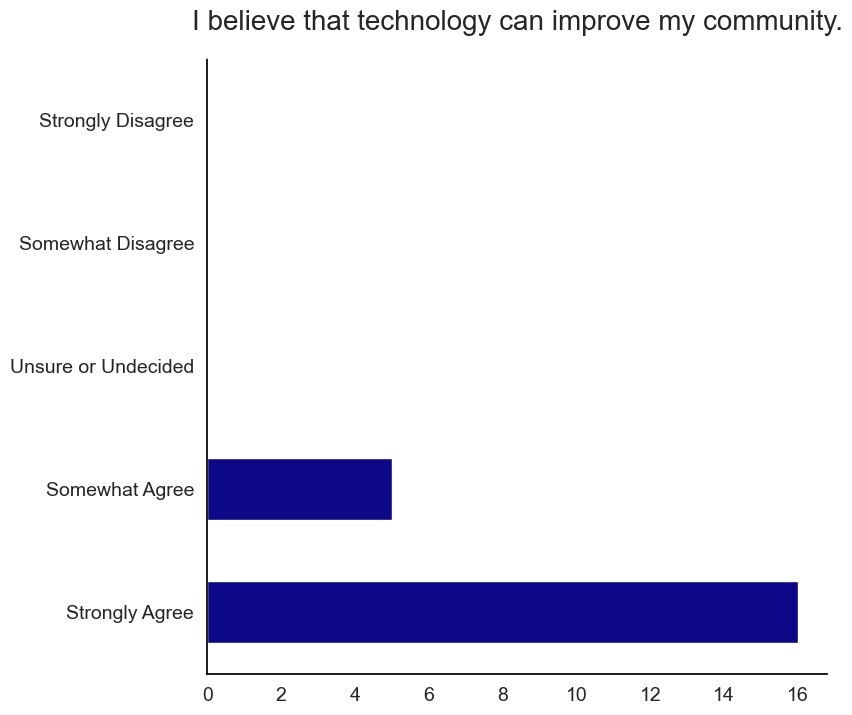

In [34]:
fig = viz.plot(kind='barh', cmap='plasma', fontsize=14, figsize=(8,8))

plt.title('I believe that technology can improve my community.', fontsize=20, pad=20)
fig.get_legend().remove()
fig.set_facecolor('white')
fig.spines["bottom"].set_color('black')
fig.spines["left"].set_color('black')
# plt.savefig('images/laney_sjcomm.png', bbox_inches='tight')

fig

<b> There were no neutral or negative responses given to this question, so no visual will following showing percentages sinces all responses (100%) were positive.</b>

In [35]:
viz = pandas.DataFrame(
    {
        "Learner Responses": [
            data["SJ & Community_1"]["strongly agree"],
            data["SJ & Community_1"]["somewhat agree"],
            data["SJ & Community_1"]["unsure or undecided"],
            data["SJ & Community_1"]["somewhat disagree"],
            data["SJ & Community_1"]["strongly disagree"],
            "TOTAL: {}".format(data["SJ & Community_1"]["valid"])
        ],
        
        "Percentages": [
            "{}%".format(round((data["SJ & Community_1"]["strongly agree"] / data["SJ & Community_1"]["valid"])*100,1)),
            "{}%".format(round((data["SJ & Community_1"]["somewhat agree"] / data["SJ & Community_1"]["valid"])*100,1)),
            "",
            "",
            "",
            "100%"
        ]
    },
    
   index = [
       "Strongly Agree",
       "Somewhat Agree",
       "Unsure or Undecided",
       "Somewhat Disagree",
       "Strongly Disagree",
       ""
   ]
)

viz

,Learner Responses,Percentages
Strongly Agree,16,76.2%
Somewhat Agree,5,23.8%
Unsure or Undecided,0,
Somewhat Disagree,0,
Strongly Disagree,0,
,TOTAL: 21,100%


<hr style="border:2px solid black">
    
<b>Next we will be examining the learners responses to our inquiries about their sense of community and belonging while participating in our programs.</b> These questions are marked as the <b>Community_1, Community_2, Community_3</b> and <b>Community_4</b> columns within the dataframe. Learners had five choices to choose from as their response to these questions: <b>Strongly Disagree, Somewhat Disagree, Somewhat Disagree, Strongly Agree</b>, and <b>Unsure or undecided.</b>

In [36]:
data = multi_response(laney, ["Community_1", "Community_2", "Community_3", "Community_4"])

laney_totals = total_multi(data)

data, laney_totals

({'Community_1': {'valid': 21,
   'strongly disagree': 0,
   'somewhat disagree': 0,
   'unsure or undecided': 1,
   'somewhat agree': 10,
   'strongly agree': 10},
  'Community_2': {'valid': 21,
   'strongly disagree': 0,
   'somewhat disagree': 0,
   'unsure or undecided': 1,
   'somewhat agree': 4,
   'strongly agree': 16},
  'Community_3': {'valid': 21,
   'strongly disagree': 0,
   'somewhat disagree': 1,
   'unsure or undecided': 1,
   'somewhat agree': 5,
   'strongly agree': 14},
  'Community_4': {'valid': 21,
   'strongly disagree': 2,
   'somewhat disagree': 2,
   'unsure or undecided': 3,
   'somewhat agree': 4,
   'strongly agree': 10}},
 {'valid': 84, 'pos': 73, 'pos_with_n': 79})

In [37]:
viz = pandas.DataFrame(
    {
        "I built relationships with other participants in my program.": [
            data["Community_1"]["strongly agree"],
            data["Community_1"]["somewhat agree"],
            data["Community_1"]["unsure or undecided"],
            data["Community_1"]["somewhat disagree"],
            data["Community_1"]["strongly disagree"],
        ],
        "I feel the Hack the Hood staff members support my success.": [
            data["Community_2"]["strongly agree"], 
            data["Community_2"]["somewhat agree"],
            data["Community_2"]["unsure or undecided"],
            data["Community_2"]["somewhat disagree"],
            data["Community_2"]["strongly disagree"],
        ],
        "The volunteers and panelists provided good advice and information during the program.": [
            data["Community_3"]["strongly agree"],
            data["Community_3"]["somewhat agree"],
            data["Community_3"]["unsure or undecided"],
            data["Community_3"]["somewhat disagree"],
            data["Community_3"]["strongly disagree"],
        ],
        "I had a chance to meet a mentor or role model in technology during this program.": [
            data["Community_4"]["strongly agree"],
            data["Community_4"]["somewhat agree"],
            data["Community_4"]["unsure or undecided"],
            data["Community_4"]["somewhat disagree"],
            data["Community_4"]["strongly disagree"],
        ],
    },
    
   index = [
       "Strongly Agree",
       "Somewhat Agree",
       "Unsure or Undecided",
       "Somewhat Disagree",
       "Strongly Disagree"
   ]
)

viz

,I built relationships with other participants in my program.,I feel the Hack the Hood staff members support my success.,The volunteers and panelists provided good advice and information during the program.,I had a chance to meet a mentor or role model in technology during this program.
Strongly Agree,10,16,14,10
Somewhat Agree,10,4,5,4
Unsure or Undecided,1,1,1,3
Somewhat Disagree,0,0,1,2
Strongly Disagree,0,0,0,2


<AxesSubplot: title={'center': 'Hack the Hood Community'}>

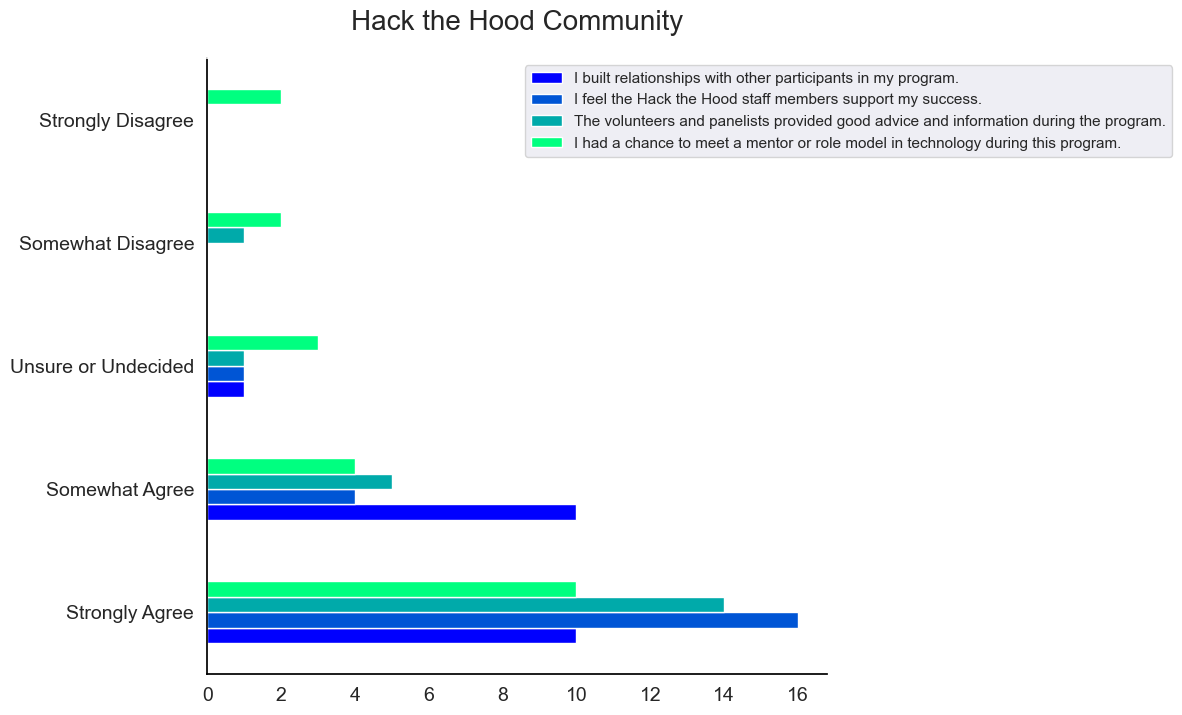

In [38]:
fig = viz.plot(kind='barh', cmap='winter', fontsize=14, figsize=(8,8))

plt.title('Hack the Hood Community', fontsize=20, pad=20)
fig.legend(bbox_to_anchor=(0.5, 1.0))
fig.set_facecolor('white')
fig.spines["bottom"].set_color('black')
fig.spines["left"].set_color('black')
# plt.savefig('images/laney_comm.png', bbox_inches='tight')

fig

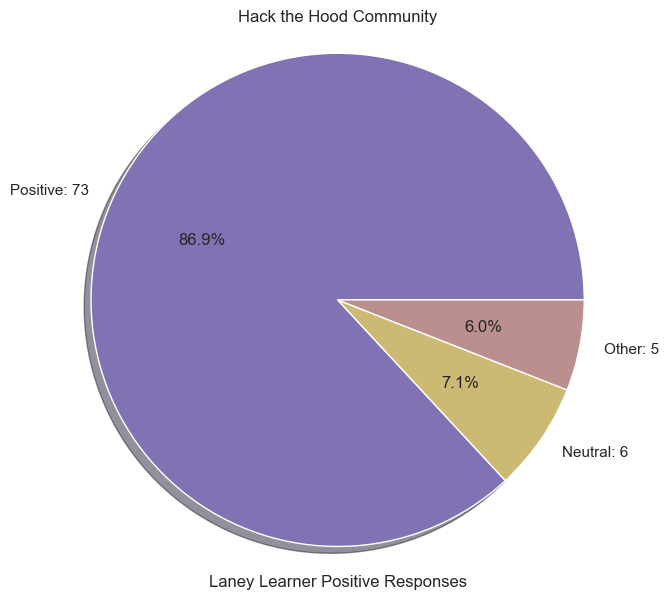

In [39]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = ['Positive: {}'.format(laney_totals["pos"]), 'Neutral: {}'.format(laney_totals["pos_with_n"] - laney_totals["pos"]), 'Other: {}'.format(laney_totals["valid"] - laney_totals["pos_with_n"])]

# creating percantages from data for visuals
per = (laney_totals["pos"] / laney_totals["valid"]) * 100
per2 = ((laney_totals["pos_with_n"] - laney_totals["pos"]) / laney_totals["valid"]) * 100
per3 = ((laney_totals["valid"] - laney_totals["pos_with_n"]) / laney_totals["valid"]) * 100

size_of_groups = [per, per2, per3]

fig1, ax1 = plt.subplots()
ax1.pie(size_of_groups, colors=["m", "y", "rosybrown"], labels=labels, autopct='%1.1f%%',
        shadow=True)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.xlabel("Laney Learner Positive Responses")
plt.title("Hack the Hood Community")
# plt.savefig('images/laney_comm_pie.png')
plt.show()

<b> There were 84 responses given for this section. Of those responses, 79 (94%) were positive including neutral responses. 73 (86.9%) were positive not including neutral responses.</b>

# I built relationships with other participants in my program.

In [40]:
data = get_response(laney, "Community_1")

data

{'valid': 21,
 'strongly disagree': 0,
 'somewhat disagree': 0,
 'unsure or undecided': 1,
 'somewhat agree': 10,
 'strongly agree': 10}

In [41]:
viz = pandas.DataFrame(
    {
        "Learner Responses": [
            data["strongly agree"],
            data["somewhat agree"],
            data["unsure or undecided"],
            data["somewhat disagree"],
            data["strongly disagree"],
            "TOTAL: {}".format(data["valid"])
        ],
        
        "Percentages": [
            "{}%".format(round((data["strongly agree"] / data["valid"])*100,1)),
            "{}%".format(round((data["somewhat agree"] / data["valid"])*100,1)),
            "{}%".format(round(((data["unsure or undecided"]) / data["valid"])*100,1)),
            "{}%".format(round((data["somewhat disagree"] / data["valid"])*100,1)),
            "{}%".format(round((data["strongly disagree"] / data["valid"])*100,1)),
            "100%"
        ]
    },
    
   index = [
       "Strongly Agree",
       "Somewhat Agree",
       "Unsure or Undecided",
       "Somewhat Disagree",
       "Strongly Disagree",
       ""
   ]
)

viz

,Learner Responses,Percentages
Strongly Agree,10,47.6%
Somewhat Agree,10,47.6%
Unsure or Undecided,1,4.8%
Somewhat Disagree,0,0.0%
Strongly Disagree,0,0.0%
,TOTAL: 21,100%


# I feel the Hack the Hood staff members support my success.

In [42]:
data = get_response(laney, "Community_2")

data

{'valid': 21,
 'strongly disagree': 0,
 'somewhat disagree': 0,
 'unsure or undecided': 1,
 'somewhat agree': 4,
 'strongly agree': 16}

In [43]:
viz = pandas.DataFrame(
    {
        "Learner Responses": [
            data["strongly agree"],
            data["somewhat agree"],
            data["unsure or undecided"],
            data["somewhat disagree"],
            data["strongly disagree"],
            "TOTAL: {}".format(data["valid"])
        ],
        
        "Percentages": [
            "{}%".format(round((data["strongly agree"] / data["valid"])*100,1)),
            "{}%".format(round((data["somewhat agree"] / data["valid"])*100,1)),
            "{}%".format(round(((data["unsure or undecided"]) / data["valid"])*100,1)),
            "{}%".format(round((data["somewhat disagree"] / data["valid"])*100,1)),
            "{}%".format(round((data["strongly disagree"] / data["valid"])*100,1)),
            "100%"
        ]
    },
    
   index = [
       "Strongly Agree",
       "Somewhat Agree",
       "Unsure or Undecided",
       "Somewhat Disagree",
       "Strongly Disagree",
       ""
   ]
)

viz

,Learner Responses,Percentages
Strongly Agree,16,76.2%
Somewhat Agree,4,19.0%
Unsure or Undecided,1,4.8%
Somewhat Disagree,0,0.0%
Strongly Disagree,0,0.0%
,TOTAL: 21,100%


# The volunteers and panelists provided good advice and information during the program.

In [44]:
data = get_response(laney, "Community_3")

data

{'valid': 21,
 'strongly disagree': 0,
 'somewhat disagree': 1,
 'unsure or undecided': 1,
 'somewhat agree': 5,
 'strongly agree': 14}

In [45]:
viz = pandas.DataFrame(
    {
        "Learner Responses": [
            data["strongly agree"],
            data["somewhat agree"],
            data["unsure or undecided"],
            data["somewhat disagree"],
            data["strongly disagree"],
            "TOTAL: {}".format(data["valid"])
        ],
        
        "Percentages": [
            "{}%".format(round((data["strongly agree"] / data["valid"])*100,2)),
            "{}%".format(round((data["somewhat agree"] / data["valid"])*100,2)),
            "{}%".format(round(((data["unsure or undecided"]) / data["valid"])*100,2)),
            "{}%".format(round((data["somewhat disagree"] / data["valid"])*100,2)),
            "{}%".format(round((data["strongly disagree"] / data["valid"])*100,2)),
            "100%"
        ]
    },
    
   index = [
       "Strongly Agree",
       "Somewhat Agree",
       "Unsure or Undecided",
       "Somewhat Disagree",
       "Strongly Disagree",
       ""
   ]
)

viz

,Learner Responses,Percentages
Strongly Agree,14,66.67%
Somewhat Agree,5,23.81%
Unsure or Undecided,1,4.76%
Somewhat Disagree,1,4.76%
Strongly Disagree,0,0.0%
,TOTAL: 21,100%


# I had a chance to meet a mentor or role model in technology during this program.

In [46]:
data = get_response(laney, "Community_4")

data

{'valid': 21,
 'strongly disagree': 2,
 'somewhat disagree': 2,
 'unsure or undecided': 3,
 'somewhat agree': 4,
 'strongly agree': 10}

In [47]:
viz = pandas.DataFrame(
    {
        "Learner Responses": [
            data["strongly agree"],
            data["somewhat agree"],
            data["unsure or undecided"],
            data["somewhat disagree"],
            data["strongly disagree"],
            "TOTAL: {}".format(data["valid"])
        ],
        
        "Percentages": [
            "{}%".format(round((data["strongly agree"] / data["valid"])*100,2)),
            "{}%".format(round((data["somewhat agree"] / data["valid"])*100,2)),
            "{}%".format(round(((data["unsure or undecided"]) / data["valid"])*100,2)),
            "{}%".format(round((data["somewhat disagree"] / data["valid"])*100,2)),
            "{}%".format(round((data["strongly disagree"] / data["valid"])*100,2)),
            "100%"
        ]
    },
    
   index = [
       "Strongly Agree",
       "Somewhat Agree",
       "Unsure or Undecided",
       "Somewhat Disagree",
       "Strongly Disagree",
       ""
   ]
)

viz

,Learner Responses,Percentages
Strongly Agree,10,47.62%
Somewhat Agree,4,19.05%
Unsure or Undecided,3,14.29%
Somewhat Disagree,2,9.52%
Strongly Disagree,2,9.52%
,TOTAL: 21,100%


<hr style="border:2px solid black">

<b>Next we will be examining the learners responses to our inquiries about them developing their careers and achieving their goals during the program.</b> These questions are marked as the <b>Goals_1, Career Opportunities_1, Career Opportunities_2</b> and <b>Career Opportunities_3</b> columns within the dataframe. Learners had five choices to choose from as their response to these questions: <b>Strongly Disagree, Somewhat Disagree, Somewhat Disagree, Strongly Agree</b>, and <b>Unsure or undecided.</b>

In [48]:
data = multi_response(laney, ["Goals_1", "Career Opportunities_1", "Career Opportunities_2"])

laney_totals = total_multi(data)

data, laney_totals

({'Goals_1': {'valid': 21,
   'strongly disagree': 1,
   'somewhat disagree': 1,
   'unsure or undecided': 0,
   'somewhat agree': 8,
   'strongly agree': 11},
  'Career Opportunities_1': {'valid': 21,
   'strongly disagree': 1,
   'somewhat disagree': 0,
   'unsure or undecided': 3,
   'somewhat agree': 8,
   'strongly agree': 9},
  'Career Opportunities_2': {'valid': 21,
   'strongly disagree': 1,
   'somewhat disagree': 0,
   'unsure or undecided': 3,
   'somewhat agree': 8,
   'strongly agree': 9}},
 {'valid': 63, 'pos': 53, 'pos_with_n': 59})

In [49]:
viz = pandas.DataFrame(
    {
        "I was able to achieve one of my goals in this program.": [
            data["Goals_1"]["strongly agree"],
            data["Goals_1"]["somewhat agree"],
            data["Goals_1"]["unsure or undecided"],
            data["Goals_1"]["somewhat disagree"],
            data["Goals_1"]["strongly disagree"],
        ],
        "I know about different positions and career options in technology.": [
            data["Career Opportunities_1"]["strongly agree"], 
            data["Career Opportunities_1"]["somewhat agree"],
            data["Career Opportunities_1"]["unsure or undecided"],
            data["Career Opportunities_1"]["somewhat disagree"],
            data["Career Opportunities_1"]["strongly disagree"],
        ],
        "I know what steps I need to take in order to pursue a career in technology.": [
            data["Career Opportunities_2"]["strongly agree"], 
            data["Career Opportunities_2"]["somewhat agree"],
            data["Career Opportunities_2"]["unsure or undecided"],
            data["Career Opportunities_2"]["somewhat disagree"],
            data["Career Opportunities_2"]["strongly disagree"],
        ]
    },
    
   index = [
       "Strongly Agree",
       "Somewhat Agree",
       "Unsure or Undecided",
       "Somewhat Disagree",
       "Strongly Disagree"
   ]
)

viz

,I was able to achieve one of my goals in this program.,I know about different positions and career options in technology.,I know what steps I need to take in order to pursue a career in technology.
Strongly Agree,11,9,9
Somewhat Agree,8,8,8
Unsure or Undecided,0,3,3
Somewhat Disagree,1,0,0
Strongly Disagree,1,1,1


<AxesSubplot: title={'center': 'Career Development'}>

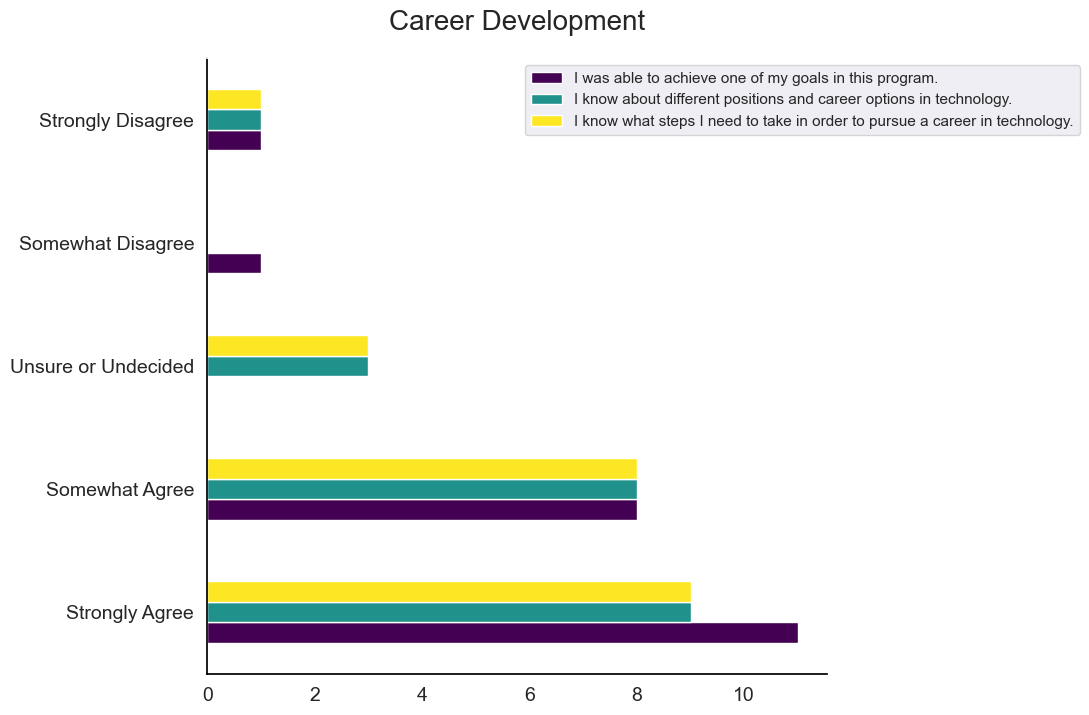

In [50]:
fig = viz.plot(kind='barh', cmap='viridis', fontsize=14, figsize=(8,8))

plt.title('Career Development', fontsize=20, pad=20)
fig.legend(bbox_to_anchor=(0.5, 1.0))
fig.set_facecolor('white')
fig.spines["bottom"].set_color('black')
fig.spines["left"].set_color('black')
# plt.savefig('images/laney_dev.png', bbox_inches='tight')

fig

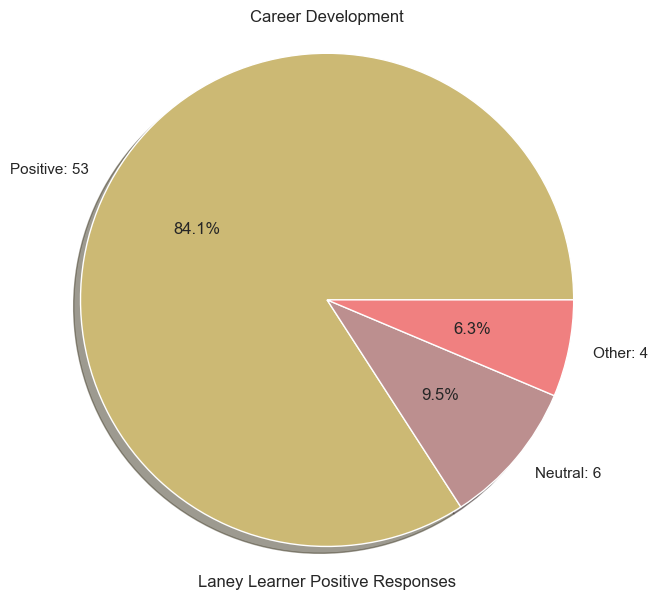

In [51]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = ['Positive: {}'.format(laney_totals["pos"]), 'Neutral: {}'.format(laney_totals["pos_with_n"] - laney_totals["pos"]), 'Other: {}'.format(laney_totals["valid"] - laney_totals["pos_with_n"])]

# creating percantages from data for visuals
per = (laney_totals["pos"] / laney_totals["valid"]) * 100
per2 = ((laney_totals["pos_with_n"] - laney_totals["pos"]) / laney_totals["valid"]) * 100
per3 = ((laney_totals["valid"] - laney_totals["pos_with_n"]) / laney_totals["valid"]) * 100

size_of_groups = [per, per2, per3]

fig1, ax1 = plt.subplots()
ax1.pie(size_of_groups, colors=["y", "rosybrown", "lightcoral"], labels=labels, autopct='%1.1f%%',
        shadow=True)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.xlabel("Laney Learner Positive Responses")
plt.title("Career Development")
# plt.savefig('images/laney_dev_pie.png')
plt.show()

<b>There were 63 responses given for this section. Of those responses, 59 (93.7%) were positive including neutral responses. 53 (84.1%) were positive not including neutral responses.</b>

# I was able to achieve one of my goals in this program.

In [52]:
data = get_response(laney, "Goals_1")

data

{'valid': 21,
 'strongly disagree': 1,
 'somewhat disagree': 1,
 'unsure or undecided': 0,
 'somewhat agree': 8,
 'strongly agree': 11}

In [53]:
viz = pandas.DataFrame(
    {
        "Learner Responses": [
            data["strongly agree"],
            data["somewhat agree"],
            data["unsure or undecided"],
            data["somewhat disagree"],
            data["strongly disagree"],
            "TOTAL: {}".format(data["valid"])
        ],
        
        "Percentages": [
            "{}%".format(round((data["strongly agree"] / data["valid"])*100,1)),
            "{}%".format(round((data["somewhat agree"] / data["valid"])*100,1)),
            "{}%".format(round(((data["unsure or undecided"]) / data["valid"])*100,1)),
            "{}%".format(round((data["somewhat disagree"] / data["valid"])*100,1)),
            "{}%".format(round((data["strongly disagree"] / data["valid"])*100,1)),
            "100%"
        ]
    },
    
   index = [
       "Strongly Agree",
       "Somewhat Agree",
       "Unsure or Undecided",
       "Somewhat Disagree",
       "Strongly Disagree",
       ""
   ]
)

viz

,Learner Responses,Percentages
Strongly Agree,11,52.4%
Somewhat Agree,8,38.1%
Unsure or Undecided,0,0.0%
Somewhat Disagree,1,4.8%
Strongly Disagree,1,4.8%
,TOTAL: 21,100%


# I know about different positions and career options in technology.

In [54]:
data = get_response(laney, "Career Opportunities_1")

data

{'valid': 21,
 'strongly disagree': 1,
 'somewhat disagree': 0,
 'unsure or undecided': 3,
 'somewhat agree': 8,
 'strongly agree': 9}

In [55]:
viz = pandas.DataFrame(
    {
        "Learner Responses": [
            data["strongly agree"],
            data["somewhat agree"],
            data["unsure or undecided"],
            data["somewhat disagree"],
            data["strongly disagree"],
            "TOTAL: {}".format(data["valid"])
        ],
        
        "Percentages": [
            "{}%".format(round((data["strongly agree"] / data["valid"])*100,3)),
            "{}%".format(round((data["somewhat agree"] / data["valid"])*100,3)),
            "{}%".format(round(((data["unsure or undecided"]) / data["valid"])*100,3)),
            "{}%".format(round((data["somewhat disagree"] / data["valid"])*100,3)),
            "{}%".format(round((data["strongly disagree"] / data["valid"])*100,3)),
            "100%"
        ]
    },
    
   index = [
       "Strongly Agree",
       "Somewhat Agree",
       "Unsure or Undecided",
       "Somewhat Disagree",
       "Strongly Disagree",
       ""
   ]
)

viz

,Learner Responses,Percentages
Strongly Agree,9,42.857%
Somewhat Agree,8,38.095%
Unsure or Undecided,3,14.286%
Somewhat Disagree,0,0.0%
Strongly Disagree,1,4.762%
,TOTAL: 21,100%


# I know what steps I need to take in order to pursue a career in technology.

In [56]:
data = get_response(laney, "Career Opportunities_2")

data

{'valid': 21,
 'strongly disagree': 1,
 'somewhat disagree': 0,
 'unsure or undecided': 3,
 'somewhat agree': 8,
 'strongly agree': 9}

In [57]:
viz = pandas.DataFrame(
    {
        "Learner Responses": [
            data["strongly agree"],
            data["somewhat agree"],
            data["unsure or undecided"],
            data["somewhat disagree"],
            data["strongly disagree"],
            "TOTAL: {}".format(data["valid"])
        ],
        
        "Percentages": [
            "{}%".format(round((data["strongly agree"] / data["valid"])*100,3)),
            "{}%".format(round((data["somewhat agree"] / data["valid"])*100,3)),
            "{}%".format(round(((data["unsure or undecided"]) / data["valid"])*100,3)),
            "{}%".format(round((data["somewhat disagree"] / data["valid"])*100,3)),
            "{}%".format(round((data["strongly disagree"] / data["valid"])*100,3)),
            "100%"
        ]
    },
    
   index = [
       "Strongly Agree",
       "Somewhat Agree",
       "Unsure or Undecided",
       "Somewhat Disagree",
       "Strongly Disagree",
       ""
   ]
)

viz

,Learner Responses,Percentages
Strongly Agree,9,42.857%
Somewhat Agree,8,38.095%
Unsure or Undecided,3,14.286%
Somewhat Disagree,0,0.0%
Strongly Disagree,1,4.762%
,TOTAL: 21,100%


<hr style="border:2px solid black">
    
<b>Next we will be examining the learners responses to our inquiries about their intersectional tech identities</b>, or how much they feel they belong in the tech space and have access to resources to be successful. These questions are marked as the <b>Gee_1, Gee_2, Gee_3, McAlpine_1, McAlpine_2, McAlpine_3, McAlpine_4,</b> and <b>McAlpine_5</b> columns within the dataframe. Learners had five choices to choose from as their response to these questions: <b>Strongly Disagree, Somewhat Disagree, Somewhat Disagree, Strongly Agree</b>, and <b>Unsure or undecided.</b>

<b>It is important to note that this section was not broken into subsections like Communication about Technology and Hth Affective. As such, the overall pie chart visual from before (output 7) still represents this group. No new pie chart will follow.</b>

In [58]:
data = multi_response(laney, ["Gee_1", "Gee_2", "Gee_3", "McAlpine_1", "McAlpine_2", "McAlpine_3", "McAlpine_4", "McAlpine_5"])

laney_totals = total_multi(data)

data, laney_totals

({'Gee_1': {'valid': 21,
   'strongly disagree': 0,
   'somewhat disagree': 0,
   'unsure or undecided': 2,
   'somewhat agree': 4,
   'strongly agree': 15},
  'Gee_2': {'valid': 21,
   'strongly disagree': 0,
   'somewhat disagree': 0,
   'unsure or undecided': 1,
   'somewhat agree': 4,
   'strongly agree': 16},
  'Gee_3': {'valid': 21,
   'strongly disagree': 0,
   'somewhat disagree': 0,
   'unsure or undecided': 3,
   'somewhat agree': 6,
   'strongly agree': 12},
  'McAlpine_1': {'valid': 21,
   'strongly disagree': 0,
   'somewhat disagree': 0,
   'unsure or undecided': 2,
   'somewhat agree': 6,
   'strongly agree': 13},
  'McAlpine_2': {'valid': 21,
   'strongly disagree': 0,
   'somewhat disagree': 1,
   'unsure or undecided': 3,
   'somewhat agree': 5,
   'strongly agree': 12},
  'McAlpine_3': {'valid': 21,
   'strongly disagree': 0,
   'somewhat disagree': 0,
   'unsure or undecided': 1,
   'somewhat agree': 7,
   'strongly agree': 13},
  'McAlpine_4': {'valid': 21,
   'str

In [59]:
viz = pandas.DataFrame(
    {
        "I am the type of person who will be successful in tech.": [
            data["Gee_1"]["strongly agree"], 
            data["Gee_1"]["somewhat agree"],
            data["Gee_1"]["unsure or undecided"],
            data["Gee_1"]["somewhat disagree"],
            data["Gee_1"]["strongly disagree"],
        ],
        "Hack the Hood helped me see myself as a technical person.": [
            data["Gee_2"]["strongly agree"], 
            data["Gee_2"]["somewhat agree"],
            data["Gee_2"]["unsure or undecided"],
            data["Gee_2"]["somewhat disagree"],
            data["Gee_2"]["strongly disagree"],
        ],
        "My classmates are people I want to work with in the future.": [
            data["Gee_3"]["strongly agree"], 
            data["Gee_3"]["somewhat agree"],
            data["Gee_3"]["unsure or undecided"],
            data["Gee_3"]["somewhat disagree"],
            data["Gee_3"]["strongly disagree"],
        ],
        "I was able to contribute and help in my class experience.": [
            data["McAlpine_1"]["strongly agree"],
            data["McAlpine_1"]["somewhat agree"],
            data["McAlpine_1"]["unsure or undecided"],
            data["McAlpine_1"]["somewhat disagree"],
            data["McAlpine_1"]["strongly disagree"],
        ],
        "I figured out how to get help or fix my coding challenges.": [
            data["McAlpine_2"]["strongly agree"],
            data["McAlpine_2"]["somewhat agree"],
            data["McAlpine_2"]["unsure or undecided"],
            data["McAlpine_2"]["somewhat disagree"],
            data["McAlpine_2"]["strongly disagree"],
        ],
        "I found or continued a new hobby through this program.": [
            data["McAlpine_3"]["strongly agree"],
            data["McAlpine_3"]["somewhat agree"],
            data["McAlpine_3"]["unsure or undecided"],
            data["McAlpine_3"]["somewhat disagree"],
            data["McAlpine_3"]["strongly disagree"],
        ],
        "I received resources to help me in my future.": [
            data["McAlpine_4"]["strongly agree"],
            data["McAlpine_4"]["somewhat agree"],
            data["McAlpine_4"]["unsure or undecided"],
            data["McAlpine_4"]["somewhat disagree"],
            data["McAlpine_4"]["strongly disagree"],
        ],
        "Hack the Hood provided enough resources to help me be successful in this program": [
            data["McAlpine_5"]["strongly agree"],
            data["McAlpine_5"]["somewhat agree"],
            data["McAlpine_5"]["unsure or undecided"],
            data["McAlpine_5"]["somewhat disagree"],
            data["McAlpine_5"]["strongly disagree"],
        ]
    },
    
   index = [
       "Strongly Agree",
       "Somewhat Agree",
       "Unsure or Undecided",
       "Somewhat Disagree",
       "Strongly Disagree"
   ]
)

viz

,I am the type of person who will be successful in tech.,Hack the Hood helped me see myself as a technical person.,My classmates are people I want to work with in the future.,I was able to contribute and help in my class experience.,I figured out how to get help or fix my coding challenges.,I found or continued a new hobby through this program.,I received resources to help me in my future.,Hack the Hood provided enough resources to help me be successful in this program
Strongly Agree,15,16,12,13,12,13,11,15
Somewhat Agree,4,4,6,6,5,7,9,5
Unsure or Undecided,2,1,3,2,3,1,1,1
Somewhat Disagree,0,0,0,0,1,0,0,0
Strongly Disagree,0,0,0,0,0,0,0,0


<AxesSubplot: title={'center': 'Intersectional Tech Identity'}>

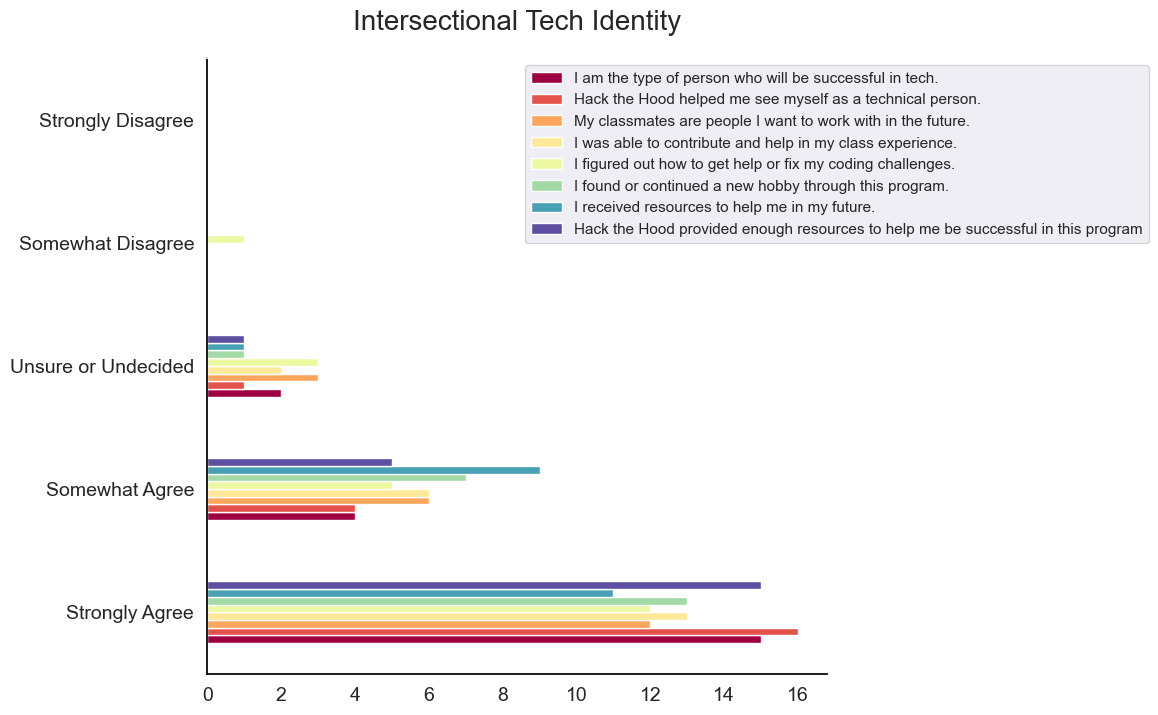

In [60]:
fig = viz.plot(kind='barh', cmap='Spectral', fontsize=14, figsize=(8,8))

plt.title('Intersectional Tech Identity', fontsize=20, pad=20)
fig.legend(bbox_to_anchor=(0.5, 1.0))
fig.set_facecolor('white')
fig.spines["bottom"].set_color('black')
fig.spines["left"].set_color('black')
# plt.savefig('images/laney_identity.png', bbox_inches='tight')

fig

# I am the type of person who will be successful in tech.

In [61]:
data = get_response(laney, "Gee_1")

data

{'valid': 21,
 'strongly disagree': 0,
 'somewhat disagree': 0,
 'unsure or undecided': 2,
 'somewhat agree': 4,
 'strongly agree': 15}

In [62]:
viz = pandas.DataFrame(
    {
        "Learner Responses": [
            data["strongly agree"],
            data["somewhat agree"],
            data["unsure or undecided"],
            data["somewhat disagree"],
            data["strongly disagree"],
            "TOTAL: {}".format(data["valid"])
        ],
        
        "Percentages": [
            "{}%".format(round((data["strongly agree"] / data["valid"])*100,2)),
            "{}%".format(round((data["somewhat agree"] / data["valid"])*100,2)),
            "{}%".format(round(((data["unsure or undecided"]) / data["valid"])*100,2)),
            "{}%".format(round((data["somewhat disagree"] / data["valid"])*100,2)),
            "{}%".format(round((data["strongly disagree"] / data["valid"])*100,2)),
            "100%"
        ]
    },
    
   index = [
       "Strongly Agree",
       "Somewhat Agree",
       "Unsure or Undecided",
       "Somewhat Disagree",
       "Strongly Disagree",
       ""
   ]
)

viz

,Learner Responses,Percentages
Strongly Agree,15,71.43%
Somewhat Agree,4,19.05%
Unsure or Undecided,2,9.52%
Somewhat Disagree,0,0.0%
Strongly Disagree,0,0.0%
,TOTAL: 21,100%


# Hack the Hood helped me see myself as a technical person.

In [63]:
data = get_response(laney, "Gee_2")

data

{'valid': 21,
 'strongly disagree': 0,
 'somewhat disagree': 0,
 'unsure or undecided': 1,
 'somewhat agree': 4,
 'strongly agree': 16}

In [64]:
viz = pandas.DataFrame(
    {
        "Learner Responses": [
            data["strongly agree"],
            data["somewhat agree"],
            data["unsure or undecided"],
            data["somewhat disagree"],
            data["strongly disagree"],
            "TOTAL: {}".format(data["valid"])
        ],
        
        "Percentages": [
            "{}%".format(round((data["strongly agree"] / data["valid"])*100,3)),
            "{}%".format(round((data["somewhat agree"] / data["valid"])*100,3)),
            "{}%".format(round(((data["unsure or undecided"]) / data["valid"])*100,3)),
            "{}%".format(round((data["somewhat disagree"] / data["valid"])*100,3)),
            "{}%".format(round((data["strongly disagree"] / data["valid"])*100,3)),
            "100%"
        ]
    },
    
   index = [
       "Strongly Agree",
       "Somewhat Agree",
       "Unsure or Undecided",
       "Somewhat Disagree",
       "Strongly Disagree",
       ""
   ]
)

viz

,Learner Responses,Percentages
Strongly Agree,16,76.19%
Somewhat Agree,4,19.048%
Unsure or Undecided,1,4.762%
Somewhat Disagree,0,0.0%
Strongly Disagree,0,0.0%
,TOTAL: 21,100%


# My classmates are people I want to work with in the future.

In [65]:
data = get_response(laney, "Gee_3")

data

{'valid': 21,
 'strongly disagree': 0,
 'somewhat disagree': 0,
 'unsure or undecided': 3,
 'somewhat agree': 6,
 'strongly agree': 12}

In [66]:
viz = pandas.DataFrame(
    {
        "Learner Responses": [
            data["strongly agree"],
            data["somewhat agree"],
            data["unsure or undecided"],
            data["somewhat disagree"],
            data["strongly disagree"],
            "TOTAL: {}".format(data["valid"])
        ],
        
        "Percentages": [
            "{}%".format(round((data["strongly agree"] / data["valid"])*100,1)),
            "{}%".format(round((data["somewhat agree"] / data["valid"])*100,1)),
            "{}%".format(round(((data["unsure or undecided"]) / data["valid"])*100,1)),
            "{}%".format(round((data["somewhat disagree"] / data["valid"])*100,1)),
            "{}%".format(round((data["strongly disagree"] / data["valid"])*100,1)),
            "100%"
        ]
    },
    
   index = [
       "Strongly Agree",
       "Somewhat Agree",
       "Unsure or Undecided",
       "Somewhat Disagree",
       "Strongly Disagree",
       ""
   ]
)

viz

,Learner Responses,Percentages
Strongly Agree,12,57.1%
Somewhat Agree,6,28.6%
Unsure or Undecided,3,14.3%
Somewhat Disagree,0,0.0%
Strongly Disagree,0,0.0%
,TOTAL: 21,100%


# I was able to contribute and help in my class experience.

In [67]:
data = get_response(laney, "McAlpine_1")

data

{'valid': 21,
 'strongly disagree': 0,
 'somewhat disagree': 0,
 'unsure or undecided': 2,
 'somewhat agree': 6,
 'strongly agree': 13}

In [68]:
viz = pandas.DataFrame(
    {
        "Learner Responses": [
            data["strongly agree"],
            data["somewhat agree"],
            data["unsure or undecided"],
            data["somewhat disagree"],
            data["strongly disagree"],
            "TOTAL: {}".format(data["valid"])
        ],
        
        "Percentages": [
            "{}%".format(round((data["strongly agree"] / data["valid"])*100,1)),
            "{}%".format(round((data["somewhat agree"] / data["valid"])*100,1)),
            "{}%".format(round(((data["unsure or undecided"]) / data["valid"])*100,1)),
            "{}%".format(round((data["somewhat disagree"] / data["valid"])*100,1)),
            "{}%".format(round((data["strongly disagree"] / data["valid"])*100,1)),
            "100%"
        ]
    },
    
   index = [
       "Strongly Agree",
       "Somewhat Agree",
       "Unsure or Undecided",
       "Somewhat Disagree",
       "Strongly Disagree",
       ""
   ]
)

viz

,Learner Responses,Percentages
Strongly Agree,13,61.9%
Somewhat Agree,6,28.6%
Unsure or Undecided,2,9.5%
Somewhat Disagree,0,0.0%
Strongly Disagree,0,0.0%
,TOTAL: 21,100%


# I figured out how to get help or fix my coding challenges.

In [69]:
data = get_response(laney, "McAlpine_2")

data

{'valid': 21,
 'strongly disagree': 0,
 'somewhat disagree': 1,
 'unsure or undecided': 3,
 'somewhat agree': 5,
 'strongly agree': 12}

In [70]:
viz = pandas.DataFrame(
    {
        "Learner Responses": [
            data["strongly agree"],
            data["somewhat agree"],
            data["unsure or undecided"],
            data["somewhat disagree"],
            data["strongly disagree"],
            "TOTAL: {}".format(data["valid"])
        ],
        
        "Percentages": [
            "{}%".format(round((data["strongly agree"] / data["valid"])*100,1)),
            "{}%".format(round((data["somewhat agree"] / data["valid"])*100,1)),
            "{}%".format(round(((data["unsure or undecided"]) / data["valid"])*100,1)),
            "{}%".format(round((data["somewhat disagree"] / data["valid"])*100,1)),
            "{}%".format(round((data["strongly disagree"] / data["valid"])*100,1)),
            "100%"
        ]
    },
    
   index = [
       "Strongly Agree",
       "Somewhat Agree",
       "Unsure or Undecided",
       "Somewhat Disagree",
       "Strongly Disagree",
       ""
   ]
)

viz

,Learner Responses,Percentages
Strongly Agree,12,57.1%
Somewhat Agree,5,23.8%
Unsure or Undecided,3,14.3%
Somewhat Disagree,1,4.8%
Strongly Disagree,0,0.0%
,TOTAL: 21,100%


# I found or continued a new hobby through this program.

In [71]:
data = get_response(laney, "McAlpine_3")

data

{'valid': 21,
 'strongly disagree': 0,
 'somewhat disagree': 0,
 'unsure or undecided': 1,
 'somewhat agree': 7,
 'strongly agree': 13}

In [72]:
viz = pandas.DataFrame(
    {
        "Learner Responses": [
            data["strongly agree"],
            data["somewhat agree"],
            data["unsure or undecided"],
            data["somewhat disagree"],
            data["strongly disagree"],
            "TOTAL: {}".format(data["valid"])
        ],
        
        "Percentages": [
            "{}%".format(round((data["strongly agree"] / data["valid"])*100,1)),
            "{}%".format(round((data["somewhat agree"] / data["valid"])*100,1)),
            "{}%".format(round(((data["unsure or undecided"]) / data["valid"])*100,1)),
            "{}%".format(round((data["somewhat disagree"] / data["valid"])*100,1)),
            "{}%".format(round((data["strongly disagree"] / data["valid"])*100,1)),
            "100%"
        ]
    },
    
   index = [
       "Strongly Agree",
       "Somewhat Agree",
       "Unsure or Undecided",
       "Somewhat Disagree",
       "Strongly Disagree",
       ""
   ]
)

viz

,Learner Responses,Percentages
Strongly Agree,13,61.9%
Somewhat Agree,7,33.3%
Unsure or Undecided,1,4.8%
Somewhat Disagree,0,0.0%
Strongly Disagree,0,0.0%
,TOTAL: 21,100%


# I received resources to help me in my future.

In [73]:
data = get_response(laney, "McAlpine_4")

data

{'valid': 21,
 'strongly disagree': 0,
 'somewhat disagree': 0,
 'unsure or undecided': 1,
 'somewhat agree': 9,
 'strongly agree': 11}

In [74]:
viz = pandas.DataFrame(
    {
        "Learner Responses": [
            data["strongly agree"],
            data["somewhat agree"],
            data["unsure or undecided"],
            data["somewhat disagree"],
            data["strongly disagree"],
            "TOTAL: {}".format(data["valid"])
        ],
        
        "Percentages": [
            "{}%".format(round((data["strongly agree"] / data["valid"])*100,2)),
            "{}%".format(round((data["somewhat agree"] / data["valid"])*100,2)),
            "{}%".format(round(((data["unsure or undecided"]) / data["valid"])*100,2)),
            "{}%".format(round((data["somewhat disagree"] / data["valid"])*100,2)),
            "{}%".format(round((data["strongly disagree"] / data["valid"])*100,2)),
            "100%"
        ]
    },
    
   index = [
       "Strongly Agree",
       "Somewhat Agree",
       "Unsure or Undecided",
       "Somewhat Disagree",
       "Strongly Disagree",
       ""
   ]
)

viz

,Learner Responses,Percentages
Strongly Agree,11,52.38%
Somewhat Agree,9,42.86%
Unsure or Undecided,1,4.76%
Somewhat Disagree,0,0.0%
Strongly Disagree,0,0.0%
,TOTAL: 21,100%


# Hack the Hood provided enough resources to help me be successful in this program.

In [75]:
data = get_response(laney, "McAlpine_5")

data

{'valid': 21,
 'strongly disagree': 0,
 'somewhat disagree': 0,
 'unsure or undecided': 1,
 'somewhat agree': 5,
 'strongly agree': 15}

In [76]:
viz = pandas.DataFrame(
    {
        "Learner Responses": [
            data["strongly agree"],
            data["somewhat agree"],
            data["unsure or undecided"],
            data["somewhat disagree"],
            data["strongly disagree"],
            "TOTAL: {}".format(data["valid"])
        ],
        
        "Percentages": [
            "{}%".format(round((data["strongly agree"] / data["valid"])*100,1)),
            "{}%".format(round((data["somewhat agree"] / data["valid"])*100,1)),
            "{}%".format(round(((data["unsure or undecided"]) / data["valid"])*100,1)),
            "{}%".format(round((data["somewhat disagree"] / data["valid"])*100,1)),
            "{}%".format(round((data["strongly disagree"] / data["valid"])*100,1)),
            "100%"
        ]
    },
    
   index = [
       "Strongly Agree",
       "Somewhat Agree",
       "Unsure or Undecided",
       "Somewhat Disagree",
       "Strongly Disagree",
       ""
   ]
)

viz

,Learner Responses,Percentages
Strongly Agree,15,71.4%
Somewhat Agree,5,23.8%
Unsure or Undecided,1,4.8%
Somewhat Disagree,0,0.0%
Strongly Disagree,0,0.0%
,TOTAL: 21,100%
